### Building Regression and Classification Models

**OBJECTIVES**

- Use `SimpleImputer` to impute missing values
- Use `OneHotEncoder` to encode categorical features
- Use `OrdinalEncoder` to encode ordinal features
- Combine preprocessing steps using `make_column_transformer`
- Combine preprocessing and modeling with a `Pipeline`

In [42]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = fetch_openml(data_id = 42165)

In [44]:
print(data.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [45]:
df = data.frame

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

```
Ex	Excellent
   Gd	Good
   TA	Average/Typical
   Fa	Fair
   Po	Poor
```

In [47]:
cat_cols = df.select_dtypes('object')

In [48]:
ordered_columns = []
one_hots = []
for col in cat_cols.columns:
    if df[col].str.contains('Ex').sum() > 0:
        print(col)
        ordered_columns.append(col)
    else:
        one_hots.append(col)

ExterQual
ExterCond
BsmtQual
HeatingQC
KitchenQual
FireplaceQu
GarageQual
GarageCond
PoolQC


In [49]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, OrdinalEncoder

In [50]:
ordered_columns

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [51]:
ode = OrdinalEncoder(categories =  [['Ex', 'Gd', 'TA', 'Fa', 'Po']*len(ordered_columns)])

In [52]:
ode.fit_transform(df[['ExterQual']])

array([[41.],
       [42.],
       [41.],
       ...,
       [40.],
       [42.],
       [41.]])

In [53]:
ode.categories_

[array(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Ex', 'Gd', 'TA', 'Fa', 'Po', 'Ex',
        'Gd', 'TA', 'Fa', 'Po', 'Ex', 'Gd', 'TA', 'Fa', 'Po', 'Ex', 'Gd',
        'TA', 'Fa', 'Po', 'Ex', 'Gd', 'TA', 'Fa', 'Po', 'Ex', 'Gd', 'TA',
        'Fa', 'Po', 'Ex', 'Gd', 'TA', 'Fa', 'Po', 'Ex', 'Gd', 'TA', 'Fa',
        'Po'], dtype=object)]

In [54]:
df['ExterQual']

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

In [55]:
from sklearn.compose import make_column_transformer

In [56]:
[['Ex', 'Gd', 'TA', 'Fa', 'Po']]*len(ordered_columns)

[['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 ['Ex', 'Gd', 'TA', 'Fa', 'Po']]

In [57]:
df = df.replace({None: np.nan})

In [58]:
ode = OrdinalEncoder( handle_unknown = 'use_encoded_value', unknown_value=np.nan,
                     categories =  [['Ex', 'Gd', 'TA', 'Fa', 'Po']]*len(ordered_columns))

In [59]:
transformer = make_column_transformer((ode, ordered_columns),
                                      (OneHotEncoder(drop='first'), one_hots),
                                      remainder = 'passthrough')

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
imputer_transformer = make_column_transformer((SimpleImputer(strategy = 'most_frequent'), df.select_dtypes('object').columns.tolist()),
                                              (SimpleImputer(strategy='mean'), df.select_dtypes(['float', 'int']).columns.tolist()),
                                              remainder = 'passthrough')

In [62]:
df2 = pd.DataFrame(imputer_transformer.fit_transform(df), columns = df.columns)

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
transformer = make_column_transformer((OneHotEncoder(drop = 'first', handle_unknown='ignore'), one_hots),
                                      (ode, ordered_columns),
                                      remainder = 'passthrough')

In [65]:
pipe = Pipeline([('preprocess', transformer),
                 ('model', LinearRegression())])

In [66]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [67]:
pipe.fit(X, y)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [68]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [275]:
pipe.score(X, y)

0.9229254236820166

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [278]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Ex...
                                                                              'TA',
                                                                              'Fa',
                                                                              'Po'],
                                                                             ['Ex',
                                                                              'Gd',
                                                                              'TA',
                                                                              'Fa',
                                                                              'Po'],
                                                                             ['Ex',
                                                                              'Gd',
                                                                              'TA',
                                                                              'Fa',
                                                                              'Po'],
                                                                             ['Ex',
                                                                              'Gd',
                                                                              'TA',
                                                                              'Fa',
                                                                              'Po'],
                                                                             ['Ex',
                                                                              'Gd',
                                                                              'TA',
                                                                              'Fa',
                                                                              'Po'],
                                                                             ['Ex',
                                                                              'Gd',
                                                                              'TA',
                                                                              'Fa',
                                                                              'Po']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['ExterQual', 'ExterCond',
                                                   'BsmtQual', 'HeatingQC',
                                                   'KitchenQual', 'FireplaceQu',
                                                   'GarageQual', 'GarageCond',
                                                   'PoolQC'])])),
                ('model', LinearRegression())])

In [279]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [14, 15, 16, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [280]:
from sklearn.metrics import mean_squared_error

In [281]:
print(f'Train MSE: {mean_squared_error(y_train, train_preds, squared=False)}')

Train MSE: 19629.17877266976


In [282]:
print(f'Train MSE: {mean_squared_error(y_test, test_preds, squared=False)}')

Train MSE: 70792.82173260213


In [283]:
from sklearn.feature_selection import SelectKBest

In [287]:
selector = SelectKBest(k=15)

In [288]:
pipe = Pipeline([('preprocess', transformer),
                 ('selector', selector),
                 ('model', LinearRegression())])

In [289]:
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
print(f'Train MSE: {mean_squared_error(y_train, train_preds, squared=False)}')
print(f'Train MSE: {mean_squared_error(y_test, test_preds, squared=False)}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Train MSE: 42108.14371710551
Train MSE: 47942.32656377961


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [14, 15, 16, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(array([109., 543., 269., 110.,  40.,  16.,   2.,   3.,   2.,   1.]),
 array([ 34900., 105910., 176920., 247930., 318940., 389950., 460960.,
        531970., 602980., 673990., 745000.]),
 <BarContainer object of 10 artists>)

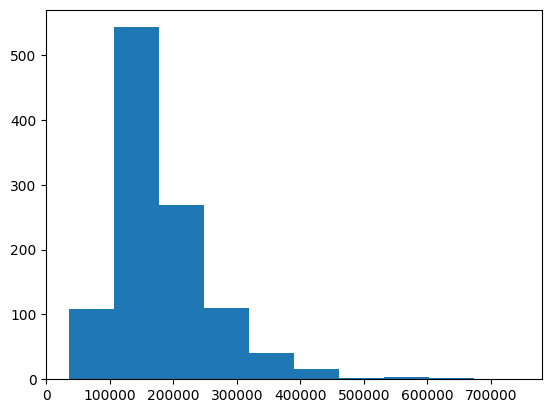

In [297]:
plt.hist(y_train)